**Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. **

**Attribute Information:

**1) ID number**

**2) Diagnosis (M = malignant, B = benign)
3-32)**

**Ten real-valued features are computed for each cell nucleus:**

**a) radius (mean of distances from center to points on the perimeter)**

**b) texture (standard deviation of gray-scale values)**

**c) perimeter**

**d) area**

**e) smoothness (local variation in radius lengths)**

**f) compactness (perimeter^2 / area - 1.0)**

**g) concavity (severity of concave portions of the contour)**

**h) concave points (number of concave portions of the contour)**

**i) symmetry**

**j) fractal dimension ("coastline approximation" - 1)**

**The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.**

**All feature values are recoded with four significant digits.**

**Missing attribute values: none**

**Class distribution: 357 benign, 212 malignant**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.simplefilter("ignore")

# Visualize Maimum columns
pd.pandas.set_option("display.max_columns",None)


In [2]:
data=pd.read_csv("C:\\Users\\Administrator\\PYTHON\\Analysisi\\data\\breast cancer.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
print("Varibales Present in the variable :", data.columns)
print("\n",70*"=")
print("Information about DataFrame: ",data.info())
print("\n",70*"=")
print("Shape of the dataframe rows: {a} and columns: {b}".format(a=data.shape[0],b=data.shape[1]))

Varibales Present in the variable : Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                5

### Here the ID column and Unnamed: 32 both are unique column, These columns can be drop out from the dataset and  Unnamed: 32 has contain all null value 

In [4]:
data.drop(columns=["id","Unnamed: 32"],inplace=True)


In [5]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [7]:
data.groupby(['diagnosis']).max()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
B,17.85,33.81,114.6,992.1,0.1634,0.2239,0.4108,0.08534,0.2743,0.09575,0.8811,4.885,5.118,77.11,0.02177,0.1064,0.3960,0.05279,0.06146,0.02984,19.82,41.78,127.1,1210.0,0.2006,0.5849,1.252,0.175,0.4228,0.1486
M,28.11,39.28,188.5,2501.0,0.1447,0.3454,0.4268,0.20120,0.3040,0.09744,2.8730,3.568,21.980,542.20,0.03113,0.1354,0.1438,0.04090,0.07895,0.01284,36.04,49.54,251.2,4254.0,0.2226,1.0580,1.170,0.291,0.6638,0.2075


In [8]:
data.groupby(['diagnosis']).min()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
B,6.981,9.71,43.79,143.5,0.05263,0.01938,0.00000,0.00000,0.1060,0.05185,0.1115,0.3602,0.757,6.802,0.001713,0.002252,0.00000,0.000000,0.009539,0.000895,7.93,12.02,50.41,185.2,0.07117,0.02729,0.00000,0.00000,0.1566,0.05521
M,10.950,10.38,71.90,361.6,0.07371,0.04605,0.02398,0.02031,0.1308,0.04996,0.1938,0.3621,1.334,13.990,0.002667,0.008422,0.01101,0.005174,0.007882,0.001087,12.84,16.67,85.10,508.1,0.08822,0.05131,0.02398,0.02899,0.1565,0.05504


Number of the missing value : 

 diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


<AxesSubplot:>

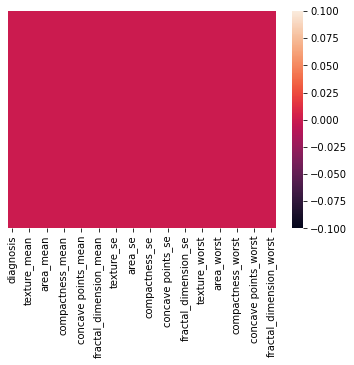

In [9]:
# Check the missing Value
print("Number of the missing value :",2*"\n", data.isnull().sum())

sns.heatmap(data.isnull(), yticklabels=False)

In [10]:
# Check the category feature from the dataset

categorical_feature=[]
thressold=10  # Those Features nunique values are less than 10 , consider as categorical features
for each in data.columns:
    if data[each].nunique()<=thressold:
        categorical_feature.append(each)
        
for each in categorical_feature:
    data[each]=data[each].astype("category")        
        
print("Category Features are: ", categorical_feature)

Category Features are:  ['diagnosis']


### Here the Diagnosis (M = malignant, B = benign) 3-32) is the target column and its binary classification to predict whether the person is cancer or not.

## Univariate Analysis:
#### Univariate analysis is the technique of comparing and analyzing the dependency of a single predictor and a response variable. The prefix "uni" means one, emphasizing the fact that the analysis only accounts for one variable's effect on a dependent variable.

In [11]:
def Cat_features(data):
    print("Unique Data:", data.unique(),"\n")
    print("Number of Unique data", data.nunique(),"\n")
    print("What are the values of unique data: ","\n", data.value_counts(),"\n")
    print("Percentage of each class : ","\n",(data.value_counts()/data.count())*100)
    print(data.value_counts().plot(kind="bar"))



Unique Data: ['M', 'B']
Categories (2, object): ['M', 'B'] 

Number of Unique data 2 

What are the values of unique data:  
 B    357
M    212
Name: diagnosis, dtype: int64 

Percentage of each class :  
 B    62.741652
M    37.258348
Name: diagnosis, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


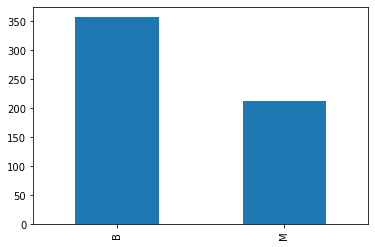

In [12]:
Cat_features(data["diagnosis"])

## The "diagnosis" column reamin balance because the "B" class conatin "357(62.74%)" and the "M" class conatin "212(37.25%)" from the "569" data points.

In [13]:
## In this data set there is one column which is categorical type so convert the categorical column in to numerical
data.replace({'B': 1, 'M': 0},inplace=True)

In [14]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


'Distribution of the dataset'

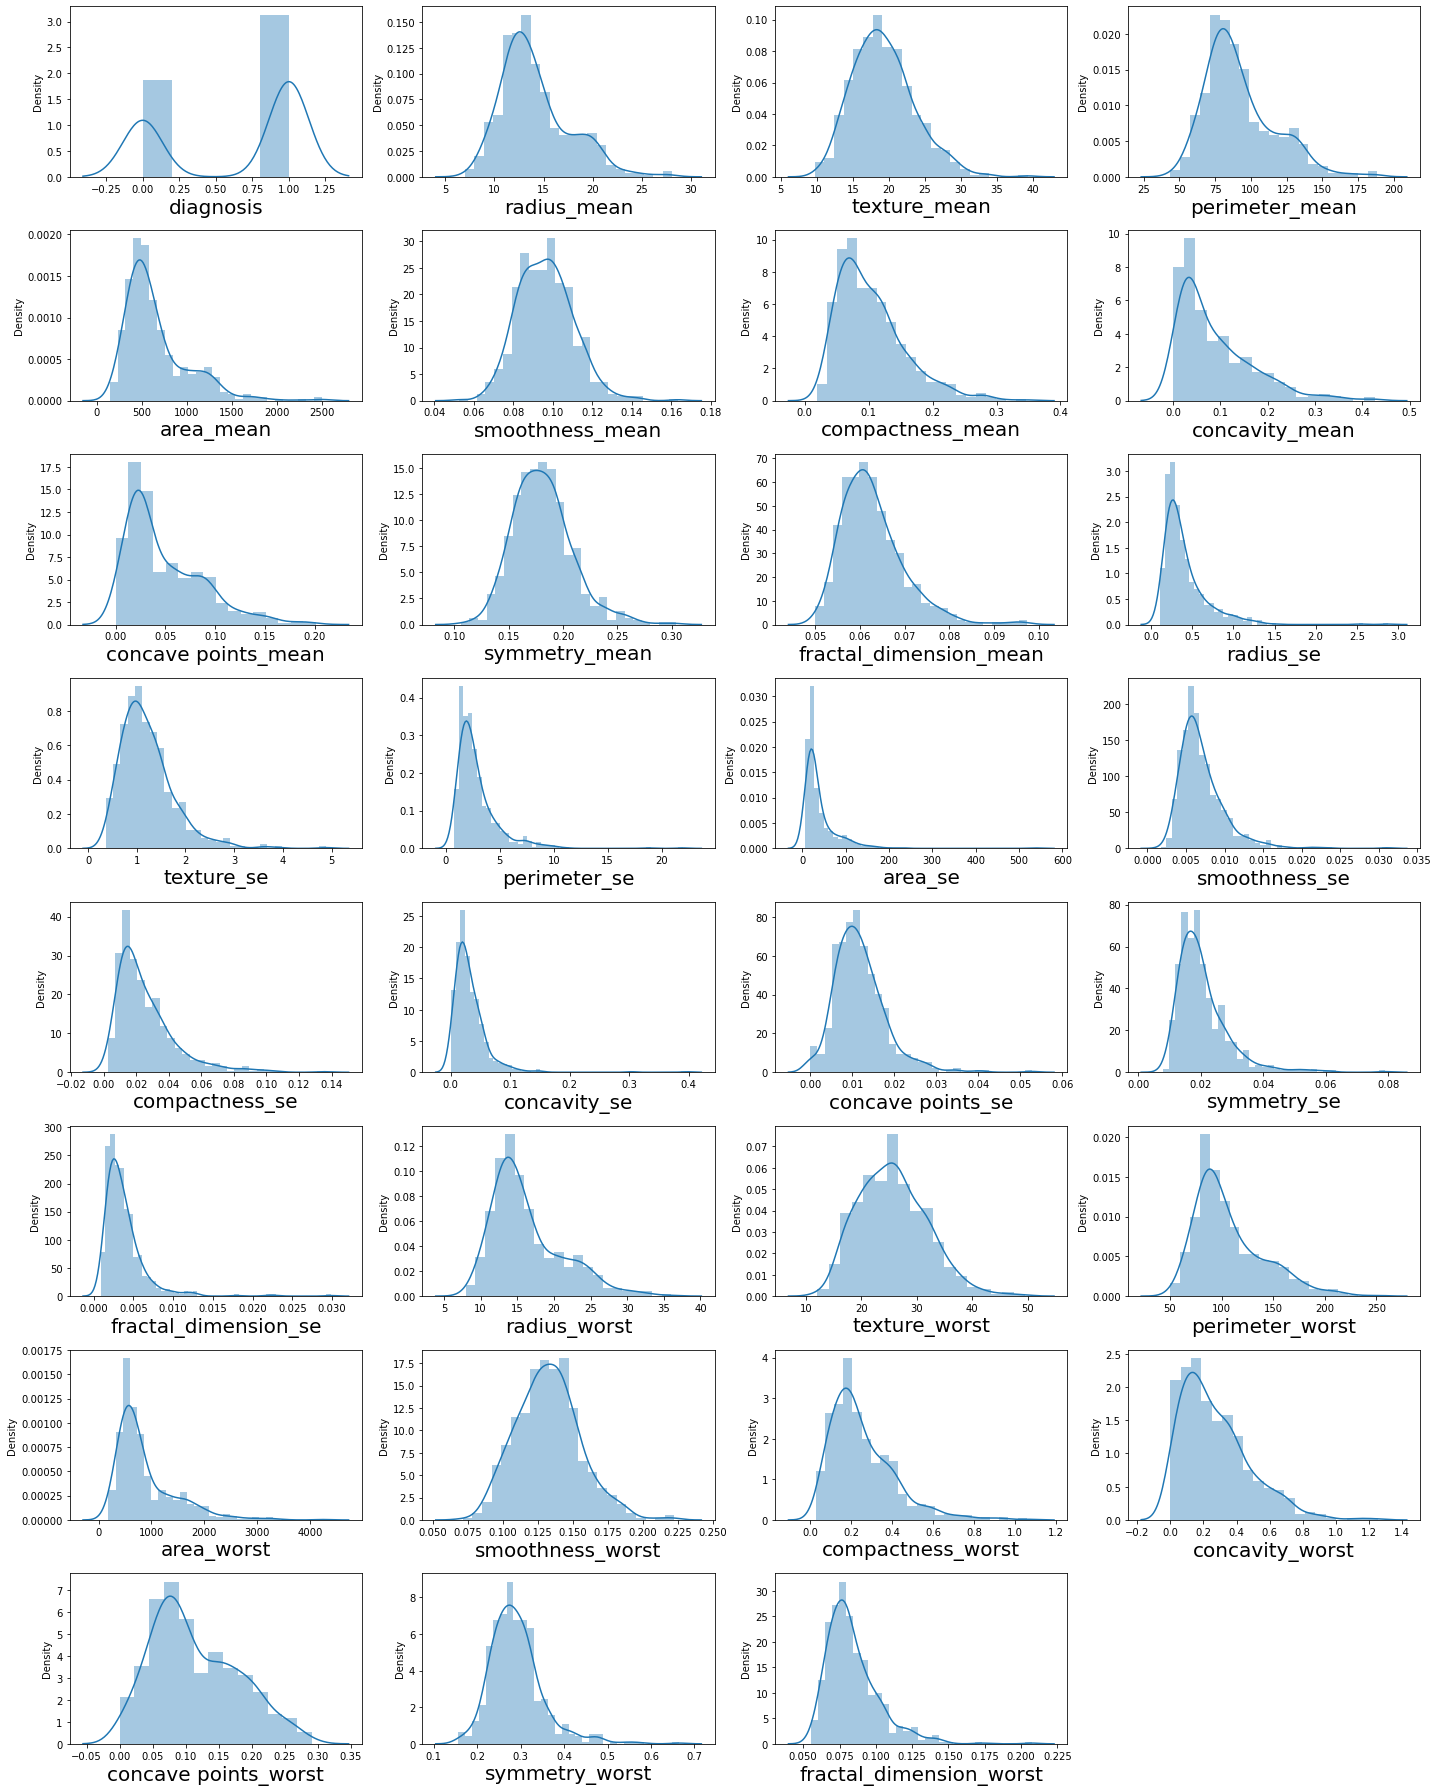

In [15]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=31 :
        ax = plt.subplot(8,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

'''Distribution of the dataset'''

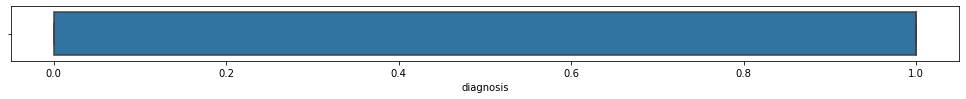

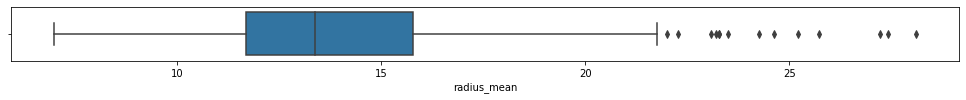

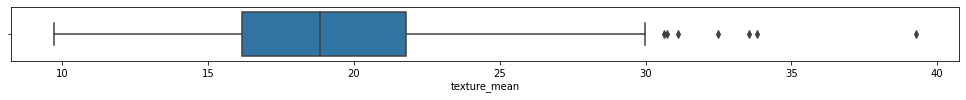

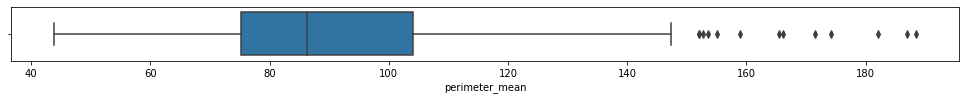

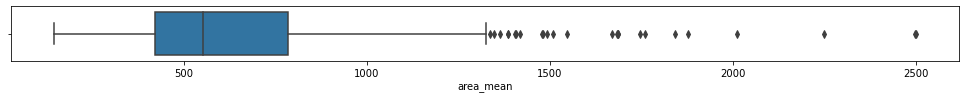

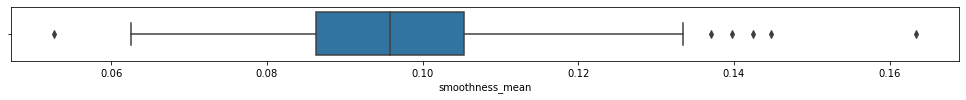

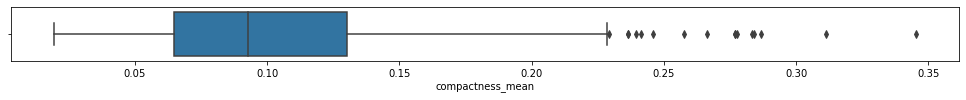

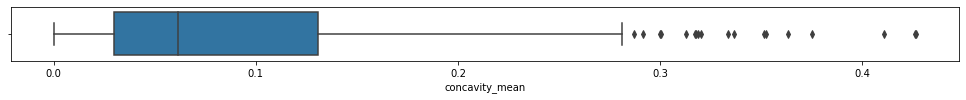

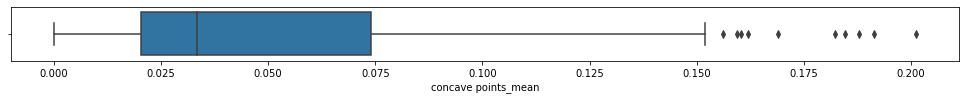

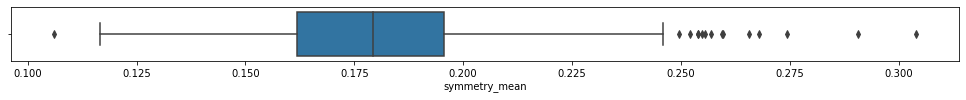

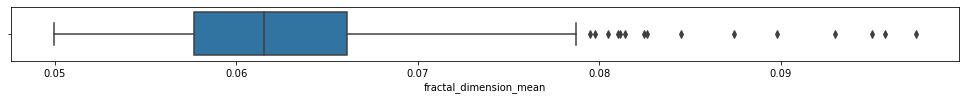

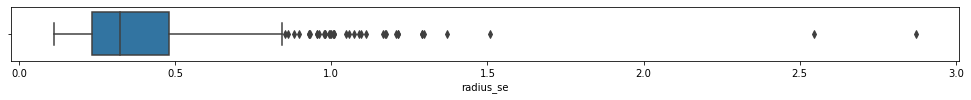

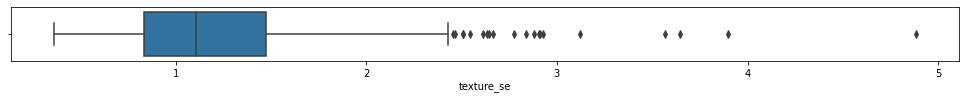

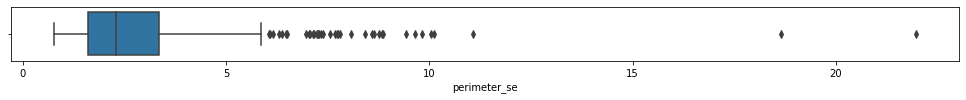

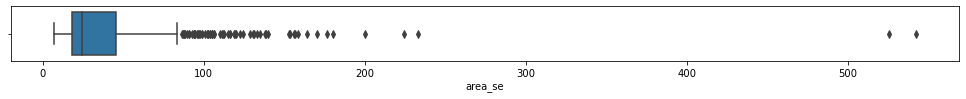

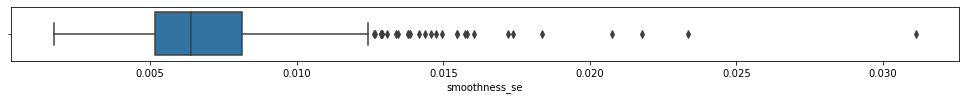

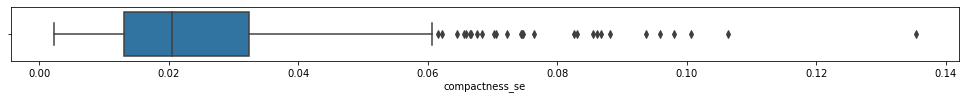

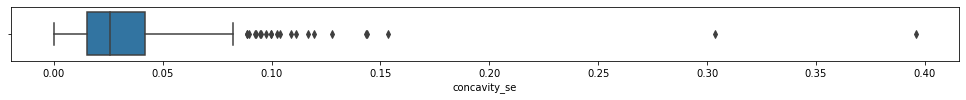

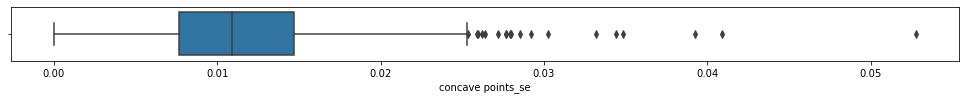

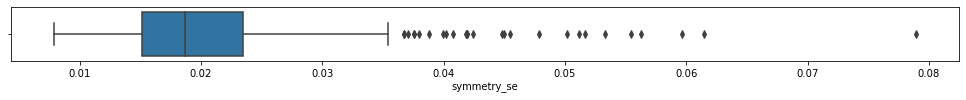

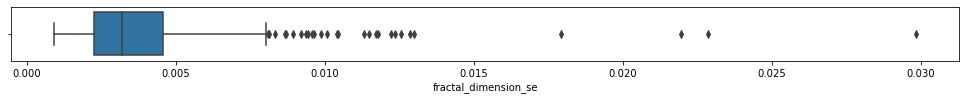

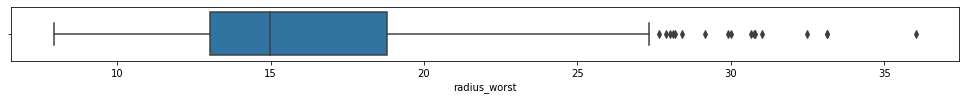

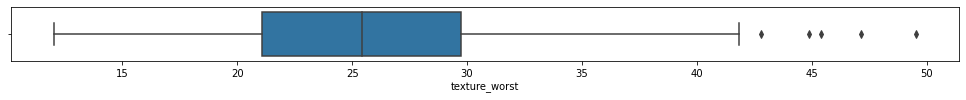

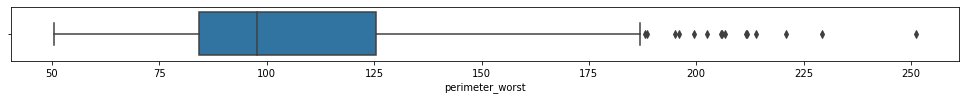

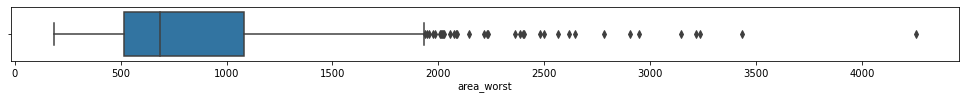

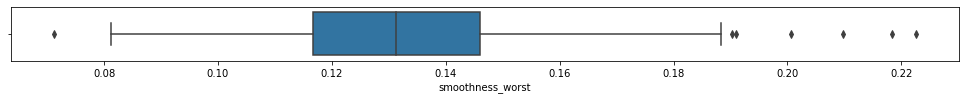

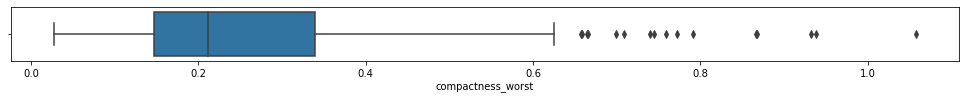

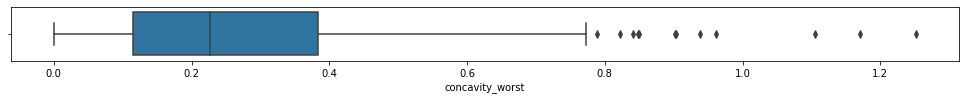

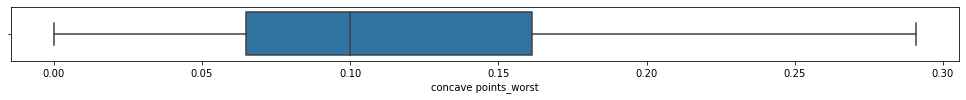

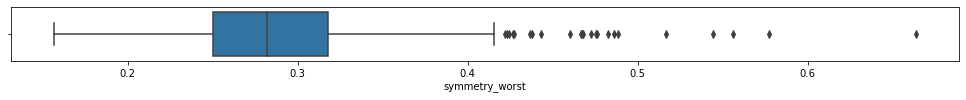

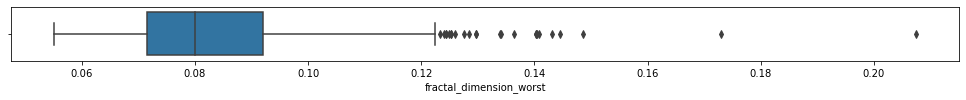

In [16]:
for column in data:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=data, x=column)

for column in data:
    plt.figure()
    data.boxplot([column])
    
cols = data.columns # one or more

Q1 = data[cols].quantile(0.25)
Q3 = data[cols].quantile(0.75)
IQR = Q3 - Q1

data = data[~((data[cols] < (Q1 - 1.5 * IQR)) |(data[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [17]:
def numdata(data):
    plt.figure(figsize=(20,20))
    plt.subplot(3,2,1)
    sns.distplot(data,bins=30)
    
    plt.subplot(3,2,2)
    sns.boxplot(data)
    plt.tight_layout()
    
    plt.subplot(3,2,3)
    plt.hist(data)
    plt.show()
    
    
# Create a function for visualize the numerical col

# Outlier Treatment

In [18]:
def otlier_treat(df,columns):
    Q1 = np.quantile(df[columns], .25) 
    Q3 = np.quantile(df[columns], .75) 
    Q2 = np.quantile(df[columns], .50)
        
    IQR = Q3-Q1
    lower_fe = Q1 -(1.5 * IQR) 
    upper_fe = Q3 +(1.5 * IQR)
    
    return Q2,lower_fe,upper_fe


for i in data.columns:
    print(i,": Median: {a} , Lower_Fence: {b}, Upper_Fence: {c}".format(a=otlier_treat(data,i)[0],b=otlier_treat(data,i)[1],c=otlier_treat(data,i)[2]),"\n")
    
        


diagnosis : Median: 1.0 , Lower_Fence: -1.5, Upper_Fence: 2.5 

radius_mean : Median: 13.37 , Lower_Fence: 5.579999999999999, Upper_Fence: 21.9 

texture_mean : Median: 18.84 , Lower_Fence: 7.725000000000003, Upper_Fence: 30.244999999999997 

perimeter_mean : Median: 86.24 , Lower_Fence: 31.775000000000013, Upper_Fence: 147.49499999999998 

area_mean : Median: 551.1 , Lower_Fence: -123.30000000000001, Upper_Fence: 1326.3000000000002 

smoothness_mean : Median: 0.09587 , Lower_Fence: 0.057975, Upper_Fence: 0.133695 

compactness_mean : Median: 0.09263 , Lower_Fence: -0.03329999999999997, Upper_Fence: 0.22861999999999996 

concavity_mean : Median: 0.06154 , Lower_Fence: -0.12215000000000001, Upper_Fence: 0.28241000000000005 

concave points_mean : Median: 0.0335 , Lower_Fence: -0.060224999999999994, Upper_Fence: 0.15453499999999998 

symmetry_mean : Median: 0.1792 , Lower_Fence: 0.11119999999999995, Upper_Fence: 0.24640000000000006 

fractal_dimension_mean : Median: 0.06154 , Lower_Fence

In [19]:
##Before Outlier Treatment Check the dataset Maximum and minimum value:
    
print("Before Outlier dataset max: ","\n", data.max(),"\n")
print("\n",70*"=")
print("Before Outlier dataset min: ","\n", data.min(),"\n")

Before Outlier dataset max:  
 diagnosis                     1.00000
radius_mean                  28.11000
texture_mean                 39.28000
perimeter_mean              188.50000
area_mean                  2501.00000
smoothness_mean               0.16340
compactness_mean              0.34540
concavity_mean                0.42680
concave points_mean           0.20120
symmetry_mean                 0.30400
fractal_dimension_mean        0.09744
radius_se                     2.87300
texture_se                    4.88500
perimeter_se                 21.98000
area_se                     542.20000
smoothness_se                 0.03113
compactness_se                0.13540
concavity_se                  0.39600
concave points_se             0.05279
symmetry_se                   0.07895
fractal_dimension_se          0.02984
radius_worst                 36.04000
texture_worst                49.54000
perimeter_worst             251.20000
area_worst                 4254.00000
smoothness_worst   

In [20]:
def otlier_treat(df,column):
    
    for i in df[column]:
        Q1 = np.quantile(df[column], .25) 
        Q3 = np.quantile(df[column], .75) 
        Q2 = np.quantile(df[column], .50)
        
        IQR = Q3-Q1
        lower = Q1 -(1.5 * IQR) 
        upper = Q3 +(1.5 * IQR)
        
        if i > upper :
            df[column]=df[column].replace(i,upper)
            if i < lower:
                df[column]=df[column].replace(i,lower)  
                
# function for outlier treatment for each columns                

In [21]:
## Outlier Tretment for each columns

otlier_treat(data,'radius_mean')
otlier_treat(data,'texture_mean')
otlier_treat(data,'perimeter_mean')
otlier_treat(data,'area_mean')
otlier_treat(data,'smoothness_mean')
otlier_treat(data,'compactness_mean')
otlier_treat(data,'concavity_mean')
otlier_treat(data,'concave points_mean')
otlier_treat(data,'symmetry_mean')
otlier_treat(data,'fractal_dimension_mean')
otlier_treat(data,'radius_se')
otlier_treat(data,'texture_se')
otlier_treat(data,'perimeter_se')
otlier_treat(data,'area_se')
otlier_treat(data,'smoothness_se')
otlier_treat(data,'compactness_se')
otlier_treat(data,'concavity_se')
otlier_treat(data,'concave points_se')
otlier_treat(data,'symmetry_se')
otlier_treat(data,'fractal_dimension_se')
otlier_treat(data,'radius_worst')
otlier_treat(data,'texture_worst')
otlier_treat(data,'perimeter_worst')
otlier_treat(data,'area_worst')
otlier_treat(data,'smoothness_worst')
otlier_treat(data,'compactness_worst')
otlier_treat(data,'concavity_worst')
otlier_treat(data,'concave points_worst')
otlier_treat(data,'symmetry_worst')
otlier_treat(data,'fractal_dimension_worst')

In [22]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,17.99,10.38,122.80,1001.0,0.118400,0.22862,0.28241,0.14710,0.2419,0.07871,0.84865,0.9053,5.9835,86.20,0.006399,0.049040,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,1937.05,0.1622,0.62695,0.7119,0.2654,0.41915,0.11890
1,0,20.57,17.77,132.90,1326.0,0.084740,0.07864,0.08690,0.07017,0.1812,0.05667,0.54350,0.7339,3.3980,74.08,0.005225,0.013080,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1937.05,0.1238,0.18660,0.2416,0.1860,0.27500,0.08902
2,0,19.69,21.25,130.00,1203.0,0.109600,0.15990,0.19740,0.12790,0.2069,0.05999,0.74560,0.7869,4.5850,86.20,0.006150,0.040060,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.00,0.1444,0.42450,0.4504,0.2430,0.36130,0.08758
3,0,11.42,20.38,77.58,386.1,0.133695,0.22862,0.24140,0.10520,0.2464,0.07875,0.49560,1.1560,3.4450,27.23,0.009110,0.061505,0.05661,0.01867,0.03596,0.008023,14.91,26.50,98.87,567.70,0.1901,0.62695,0.6869,0.2575,0.41915,0.12301
4,0,20.29,14.34,135.10,1297.0,0.100300,0.13280,0.19800,0.10430,0.1809,0.05883,0.75720,0.7813,5.4380,86.20,0.011490,0.024610,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.00,0.1374,0.20500,0.4000,0.1625,0.23640,0.07678


In [23]:
##Before Outlier Treatment Check the dataset Maximum and minimum value:
    
print("After Outlier dataset max: ","\n", data.max(),"\n")
print("\n",70*"=")
print("After Outlier dataset min: ","\n", data.min(),"\n")

After Outlier dataset max:  
 diagnosis                     1.000000
radius_mean                  21.900000
texture_mean                 30.245000
perimeter_mean              147.495000
area_mean                  1326.300000
smoothness_mean               0.133695
compactness_mean              0.228620
concavity_mean                0.282410
concave points_mean           0.154535
symmetry_mean                 0.246400
fractal_dimension_mean        0.078750
radius_se                     0.848650
texture_se                    2.434150
perimeter_se                  5.983500
area_se                      86.200000
smoothness_se                 0.012612
compactness_se                0.061505
concavity_se                  0.082490
concave points_se             0.025318
symmetry_se                   0.035960
fractal_dimension_se          0.008023
radius_worst                 27.460000
texture_worst                42.680000
perimeter_worst             187.335000
area_worst                 1937.05


sns.boxplot(data["radius_mean"])
plt.title("before")
plt.show()

def otlier_treat(df,column):
    
    for i in df[column]:
        Q1 = np.quantile(df[column], .25) 
        Q3 = np.quantile(df[column], .75) 
        Q2 = np.quantile(df[column], .50)
        
        IQR = Q3-Q1
        lower = Q1 -(1.5 * IQR) 
        upper = Q3 +(1.5 * IQR)
        
        if i > upper :
            df[column]=df[column].replace(i,upper)
            if i < lower:
                df[column]=df[column].replace(i,lower)
                
            
            
otlier_treat(data,"radius_mean")  

sns.boxplot(data["radius_mean"])
plt.title("after")
plt.show()

## After Outlier Treatment the data set distribution 

'Distribution of the dataset'

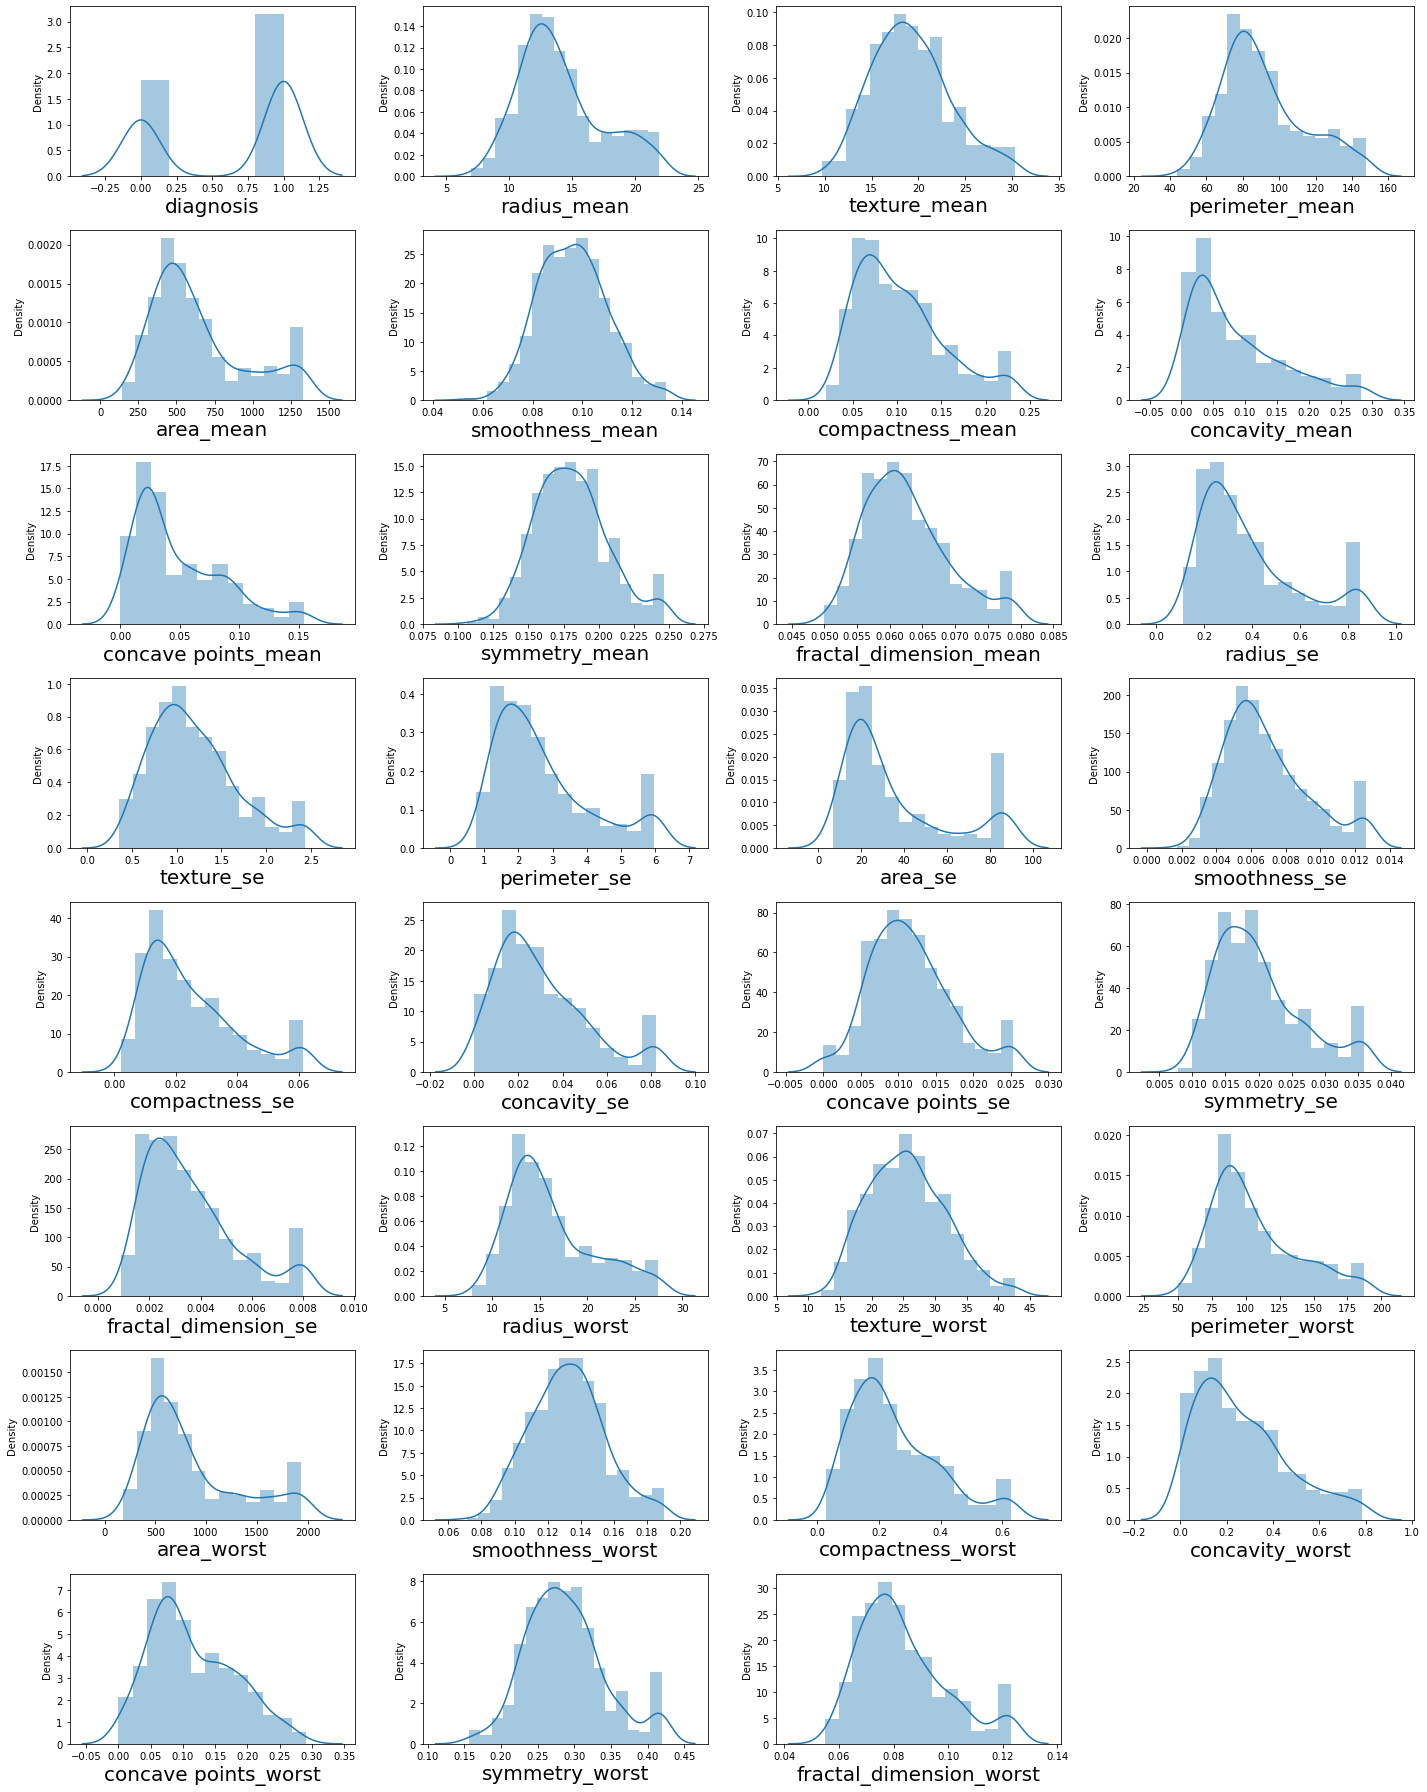

In [24]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=31 :
        ax = plt.subplot(8,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

'''Distribution of the dataset'''

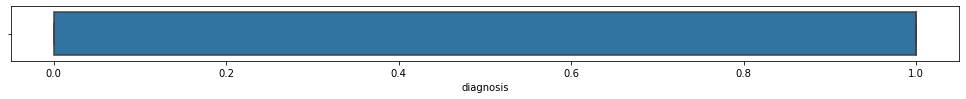

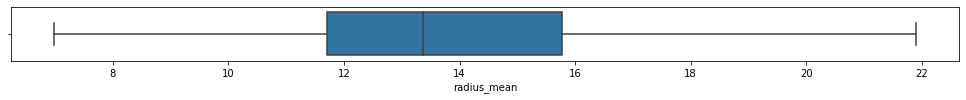

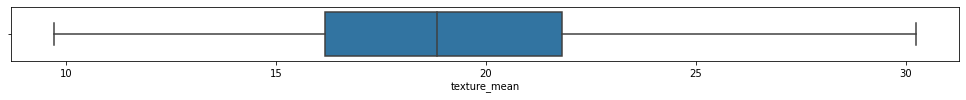

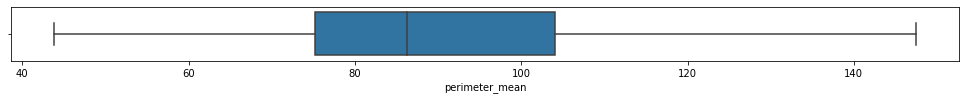

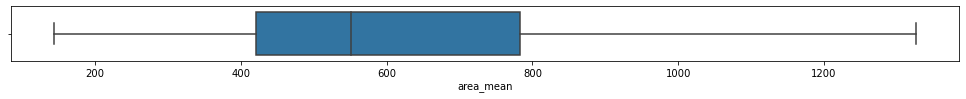

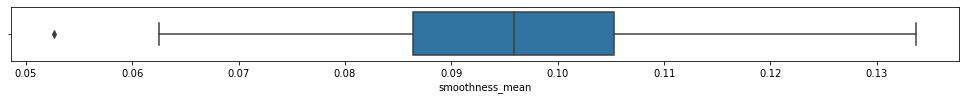

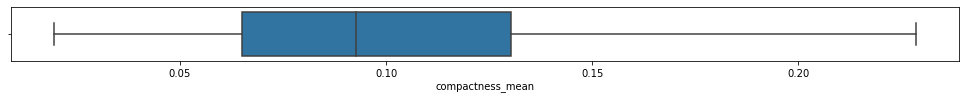

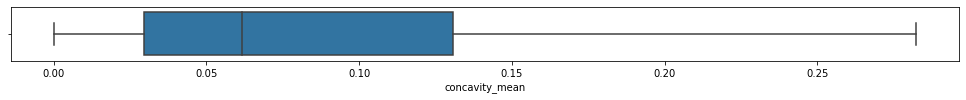

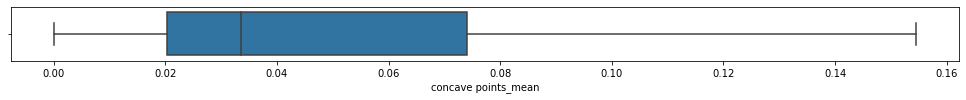

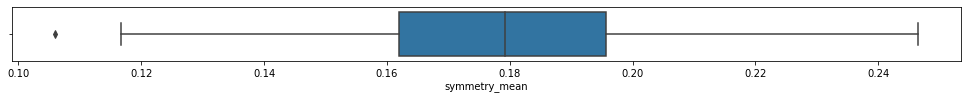

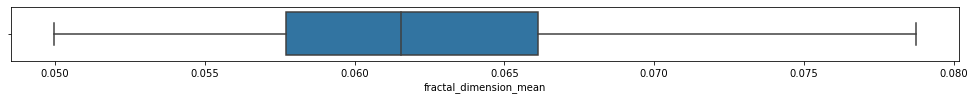

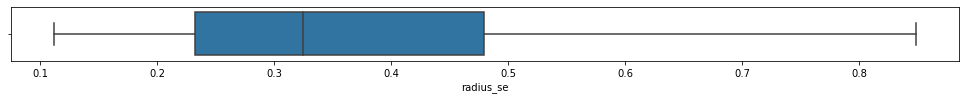

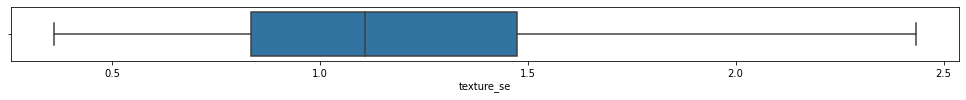

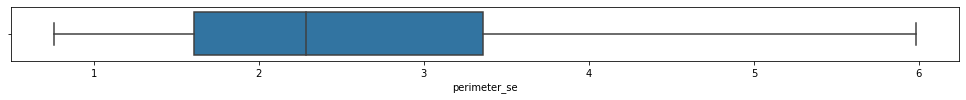

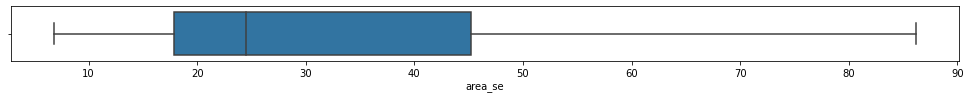

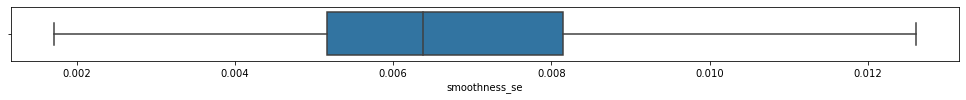

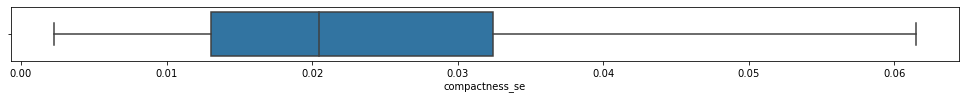

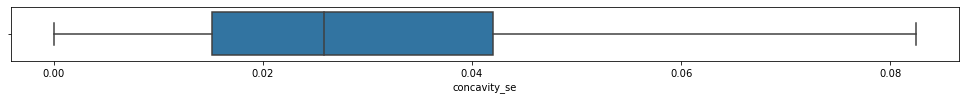

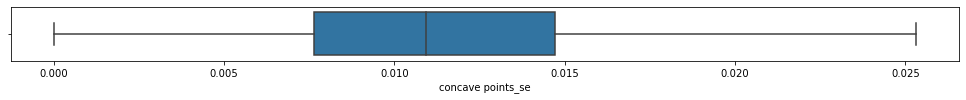

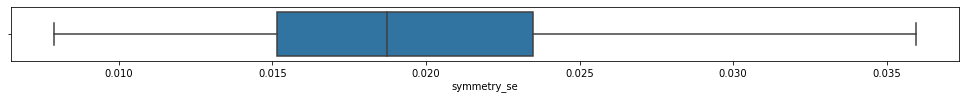

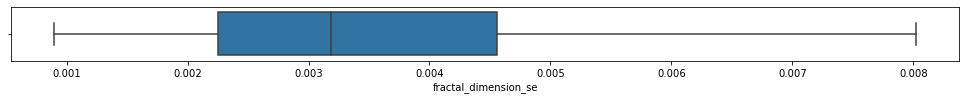

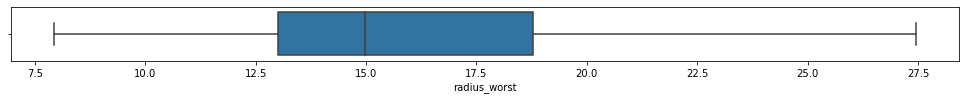

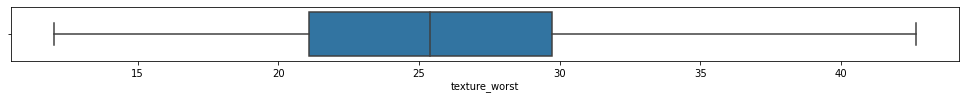

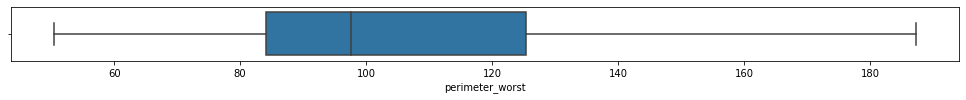

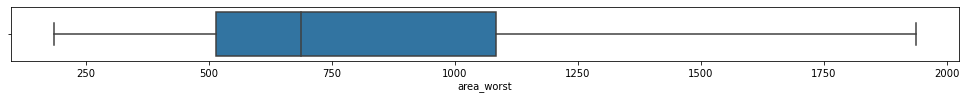

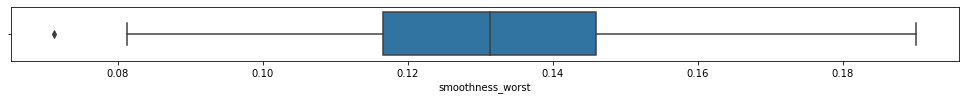

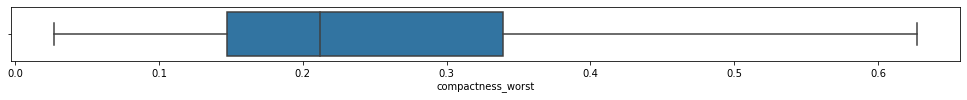

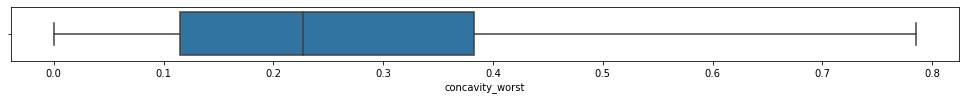

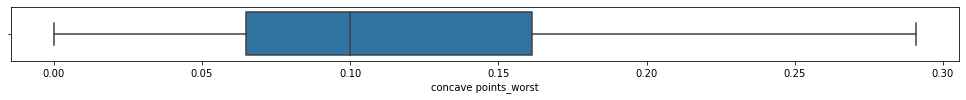

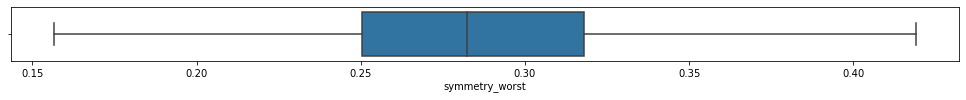

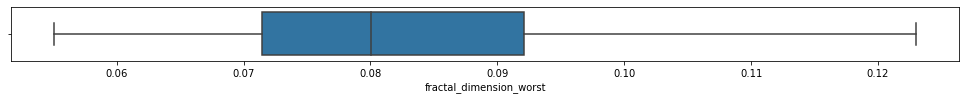

In [25]:
for column in data:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=data, x=column)

In [26]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,17.99,10.38,122.80,1001.0,0.118400,0.22862,0.28241,0.14710,0.2419,0.07871,0.84865,0.9053,5.9835,86.20,0.006399,0.049040,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,1937.05,0.1622,0.62695,0.7119,0.2654,0.41915,0.11890
1,0,20.57,17.77,132.90,1326.0,0.084740,0.07864,0.08690,0.07017,0.1812,0.05667,0.54350,0.7339,3.3980,74.08,0.005225,0.013080,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1937.05,0.1238,0.18660,0.2416,0.1860,0.27500,0.08902
2,0,19.69,21.25,130.00,1203.0,0.109600,0.15990,0.19740,0.12790,0.2069,0.05999,0.74560,0.7869,4.5850,86.20,0.006150,0.040060,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.00,0.1444,0.42450,0.4504,0.2430,0.36130,0.08758
3,0,11.42,20.38,77.58,386.1,0.133695,0.22862,0.24140,0.10520,0.2464,0.07875,0.49560,1.1560,3.4450,27.23,0.009110,0.061505,0.05661,0.01867,0.03596,0.008023,14.91,26.50,98.87,567.70,0.1901,0.62695,0.6869,0.2575,0.41915,0.12301
4,0,20.29,14.34,135.10,1297.0,0.100300,0.13280,0.19800,0.10430,0.1809,0.05883,0.75720,0.7813,5.4380,86.20,0.011490,0.024610,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.00,0.1374,0.20500,0.4000,0.1625,0.23640,0.07678


# Feature Selection:

In [27]:
# Feature Selection:
corr=data.corr()
corr


# Co-relation Matrix to check the multi-colinearity 

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,-0.745217,-0.419123,-0.759006,-0.752786,-0.366706,-0.608494,-0.727168,-0.788099,-0.334482,0.006801,-0.642399,0.000152,-0.646875,-0.739068,0.077796,-0.331837,-0.398120,-0.450133,0.069606,-0.154061,-0.793938,-0.457663,-0.800618,-0.794640,-0.423351,-0.611083,-0.683565,-0.793566,-0.419058,-0.328719
radius_mean,-0.745217,1.000000,0.332760,0.997692,0.993891,0.168623,0.502741,0.674539,0.811833,0.146921,-0.319056,0.683660,-0.110023,0.687035,0.832692,-0.278944,0.234053,0.327152,0.422631,-0.173992,-0.008658,0.973472,0.306225,0.967506,0.962549,0.126432,0.452062,0.559312,0.747817,0.187429,0.028799
texture_mean,-0.419123,0.332760,1.000000,0.339588,0.341552,-0.016830,0.241666,0.318654,0.301509,0.078661,-0.065946,0.327560,0.413346,0.341939,0.357392,0.020116,0.220249,0.235813,0.182780,0.000368,0.110895,0.355583,0.911642,0.364127,0.357193,0.077228,0.276731,0.308860,0.296948,0.108611,0.113049
perimeter_mean,-0.759006,0.997692,0.339588,1.000000,0.991861,0.205869,0.553698,0.714624,0.841871,0.181467,-0.266586,0.696934,-0.099647,0.705934,0.840760,-0.257509,0.281713,0.368255,0.455689,-0.154043,0.036179,0.974555,0.312741,0.973889,0.963900,0.158008,0.496387,0.597326,0.776769,0.212299,0.075825
area_mean,-0.752786,0.993891,0.341552,0.991861,1.000000,0.168088,0.498665,0.680126,0.814133,0.155293,-0.303524,0.712001,-0.086600,0.712171,0.857245,-0.242369,0.239557,0.333751,0.423980,-0.150152,0.008509,0.973784,0.311537,0.967206,0.973460,0.133687,0.441642,0.556230,0.739618,0.185220,0.033012
smoothness_mean,-0.366706,0.168623,-0.016830,0.205869,0.168088,1.000000,0.661408,0.526271,0.560696,0.557050,0.585905,0.318409,0.095320,0.320157,0.284067,0.347922,0.344882,0.311794,0.416157,0.157114,0.375510,0.223014,0.043923,0.247087,0.222587,0.808595,0.482308,0.446271,0.511097,0.402339,0.504195
compactness_mean,-0.608494,0.502741,0.241666,0.553698,0.498665,0.661408,1.000000,0.889882,0.832541,0.588752,0.557003,0.528689,0.044654,0.583427,0.542559,0.123382,0.780394,0.723896,0.693073,0.144096,0.619414,0.542776,0.250386,0.593643,0.537159,0.570709,0.883162,0.835009,0.824531,0.496061,0.710169
concavity_mean,-0.727168,0.674539,0.318654,0.714624,0.680126,0.526271,0.889882,1.000000,0.928382,0.488968,0.325513,0.641539,0.069178,0.682717,0.689730,0.076033,0.697114,0.771742,0.706172,0.095482,0.501686,0.702115,0.316653,0.739514,0.703992,0.462640,0.795115,0.904529,0.881502,0.414279,0.546332
concave points_mean,-0.788099,0.811833,0.301509,0.841871,0.814133,0.560696,0.832541,0.928382,1.000000,0.460392,0.170028,0.729187,0.024127,0.753484,0.799938,0.013705,0.533459,0.584701,0.669339,0.034775,0.338782,0.832188,0.298107,0.855906,0.830127,0.460023,0.701609,0.781051,0.916542,0.384190,0.396626
symmetry_mean,-0.334482,0.146921,0.078661,0.181467,0.155293,0.557050,0.588752,0.488968,0.460392,1.000000,0.471717,0.344014,0.144473,0.347806,0.293051,0.211489,0.425818,0.369707,0.387939,0.404379,0.397854,0.191595,0.098874,0.222955,0.200027,0.431679,0.478433,0.441495,0.430842,0.707733,0.451589


<AxesSubplot:>

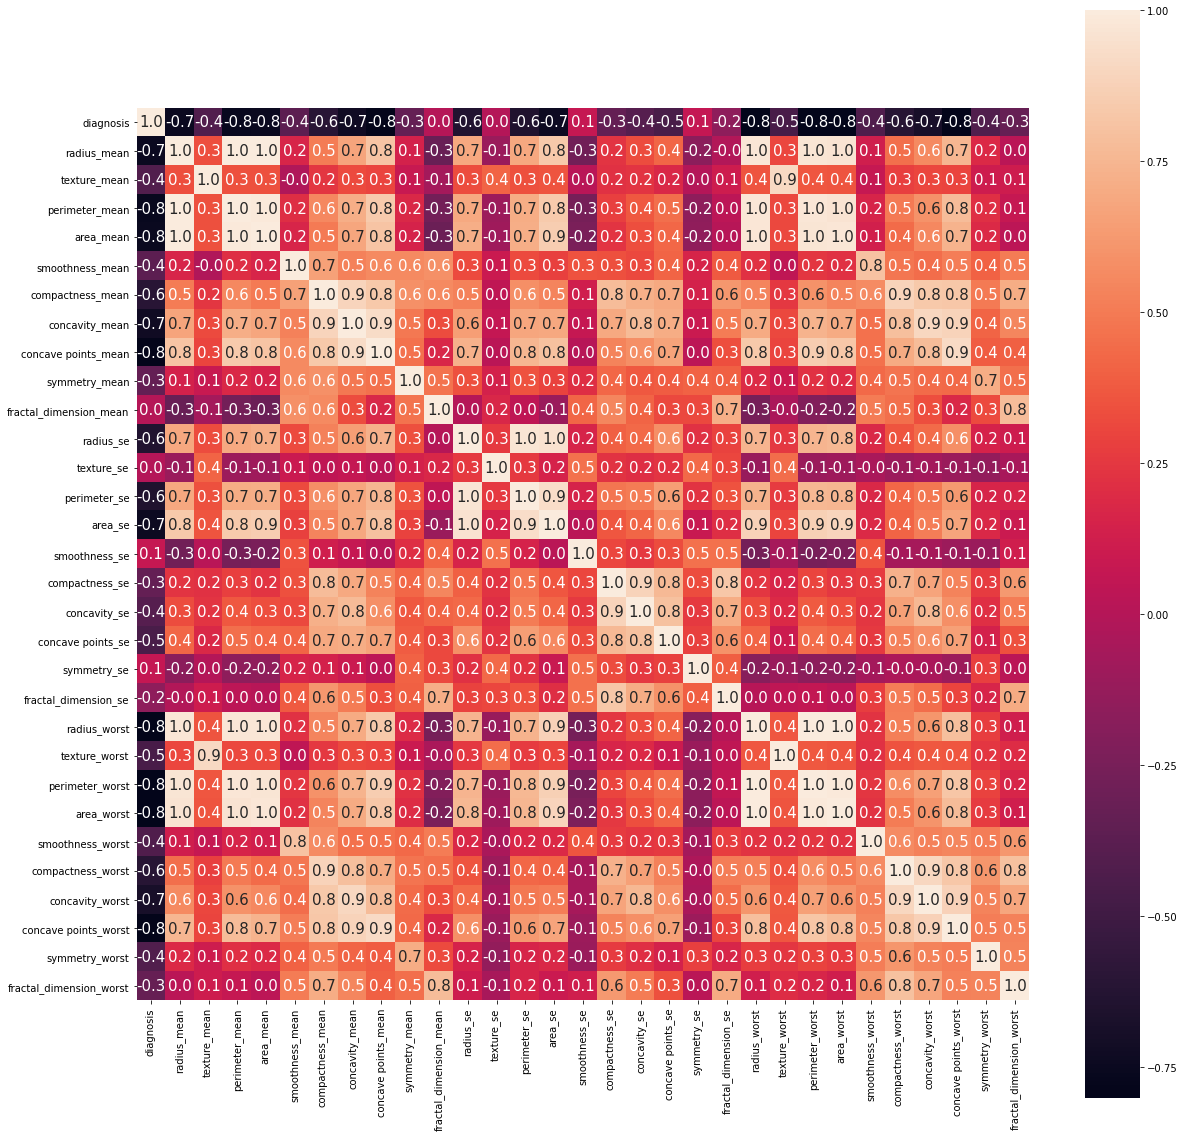

In [28]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15})

In [29]:
threshold=0.7
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr
correlation(data.iloc[:,:-1],threshold)

{'area_mean',
 'area_se',
 'area_worst',
 'compactness_se',
 'compactness_worst',
 'concave points_mean',
 'concave points_se',
 'concave points_worst',
 'concavity_mean',
 'concavity_se',
 'concavity_worst',
 'fractal_dimension_se',
 'perimeter_mean',
 'perimeter_se',
 'perimeter_worst',
 'radius_mean',
 'radius_se',
 'radius_worst',
 'smoothness_worst',
 'symmetry_worst',
 'texture_worst'}

In [30]:
len(correlation(data.iloc[:,:-1],threshold))

21

# Anova

In [31]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif #ANOVA(F-TEST)


# Separate the target column the from the dataset
X = data.drop(columns=['diagnosis'])
y=data["diagnosis"] 

print("Feature data dimension: ", X.shape)

### Apply SelectKBest Algorithm
ordered_rank_features=SelectKBest(score_func=f_classif,k=30)
ordered_feature=ordered_rank_features.fit(X,y)

#create a dataframe
dfscores=pd.DataFrame(ordered_feature.scores_,columns=["Score"])
dfcolumns=pd.DataFrame(X.columns)

features_rank=pd.concat([dfcolumns,dfscores],axis=1)
features_rank.columns=['Features','Score']
lst=features_rank.sort_values(by=["Score"],ascending=False)

print("Feature listed by socore:","\n",lst,"\n")
print("Top 10 Features are :","\n",features_rank.nlargest(21,'Score'))
#By using SelectKbest method findding the top 10 features:

Feature data dimension:  (569, 30)
Feature listed by socore: 
                    Features        Score
22          perimeter_worst  1012.338365
23               area_worst   971.473689
20             radius_worst   966.829905
27     concave points_worst   964.385393
7       concave points_mean   929.435001
2            perimeter_mean   770.546993
3                 area_mean   741.521069
0               radius_mean   708.155869
13                  area_se   682.507418
6            concavity_mean   636.243499
26          concavity_worst   497.312375
12             perimeter_se   407.975475
10                radius_se   398.395472
25        compactness_worst   337.915688
5          compactness_mean   333.379255
21            texture_worst   150.226883
17        concave points_se   144.078756
24         smoothness_worst   123.811121
1              texture_mean   120.826150
28           symmetry_worst   120.780848
16             concavity_se   106.796321
4           smoothness_mean    88.0

# chi2

In [32]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2 #chi


# Separate the target column the from the dataset
X = data.drop(columns=['diagnosis'])
y=data["diagnosis"] 

print("Feature data dimension: ", X.shape)

### Apply SelectKBest Algorithm
ordered_rank_features=SelectKBest(score_func=chi2,k=30)
ordered_feature=ordered_rank_features.fit(X,y)

#create a dataframe
dfscores=pd.DataFrame(ordered_feature.scores_,columns=["Score"])
dfcolumns=pd.DataFrame(X.columns)

features_rank_chi=pd.concat([dfcolumns,dfscores],axis=1)
features_rank_chi.columns=['Features','Score']
lst=features_rank_chi.sort_values(by=["Score"],ascending=False)

print("Feature listed by socore:","\n",lst,"\n")
print("Top 10 Features are :","\n",features_rank_chi.nlargest(21,'Score'))
#By using SelectKbest method findding the top 10 features:

Feature data dimension:  (569, 30)
Feature listed by socore: 
                    Features         Score
23               area_worst  95473.707884
3                 area_mean  46908.103938
13                  area_se   5238.033631
22          perimeter_worst   3484.702445
2            perimeter_mean   1898.657129
20             radius_worst    465.525056
0               radius_mean    250.229134
12             perimeter_se    173.331690
21            texture_worst    170.028319
1              texture_mean     90.866712
26          concavity_worst     38.505174
10                radius_se     25.260574
6            concavity_mean     18.867202
25        compactness_worst     17.321250
27     concave points_worst     13.485419
7       concave points_mean     10.290395
5          compactness_mean      4.969243
16             concavity_se      1.269073
28           symmetry_worst      1.006351
15           compactness_se      0.568929
24         smoothness_worst      0.383820
17        con

# comaparing Features:

In [33]:
cor=list(correlation(data.iloc[:,:-1],threshold))
print("corealation featue: ",cor)
print("\n",70*"=")
anova=list(features_rank.nlargest(21,'Score')["Features"])
print("ANova: ",anova)
print("\n",70*"=")
chi=list(features_rank_chi.nlargest(21,'Score')["Features"])
print("Chi: ",chi)

corealation featue:  ['perimeter_se', 'symmetry_worst', 'concave points_worst', 'concavity_worst', 'concavity_se', 'texture_worst', 'radius_mean', 'radius_se', 'concave points_mean', 'smoothness_worst', 'perimeter_mean', 'radius_worst', 'area_worst', 'area_mean', 'compactness_se', 'compactness_worst', 'concave points_se', 'concavity_mean', 'perimeter_worst', 'fractal_dimension_se', 'area_se']

ANova:  ['perimeter_worst', 'area_worst', 'radius_worst', 'concave points_worst', 'concave points_mean', 'perimeter_mean', 'area_mean', 'radius_mean', 'area_se', 'concavity_mean', 'concavity_worst', 'perimeter_se', 'radius_se', 'compactness_worst', 'compactness_mean', 'texture_worst', 'concave points_se', 'smoothness_worst', 'texture_mean', 'symmetry_worst', 'concavity_se']

Chi:  ['area_worst', 'area_mean', 'area_se', 'perimeter_worst', 'perimeter_mean', 'radius_worst', 'radius_mean', 'perimeter_se', 'texture_worst', 'texture_mean', 'concavity_worst', 'radius_se', 'concavity_mean', 'compactness_

In [34]:
type(anova)

list

In [35]:
def non_match_elements(list1, list2):
    non_match = []
    for i in list1:
        if i not in list2:
            non_match.append(i)
    return non_match
       
non_match = non_match_elements(cor, anova)
print("No match elements: ", non_match)

No match elements:  ['compactness_se', 'fractal_dimension_se']


In [36]:
def non_match_elements(list1, list2):
    non_match = []
    for i in list1:
        if i not in list2:
            non_match.append(i)
    return non_match
       
non_match = non_match_elements(cor, chi)
print("comaparing cor, chi No match elements: ", non_match)
print("\n",70*"=")
non_match = non_match_elements(anova, chi)
print("comapring anova, chi No match elements: ", non_match)
print("\n",70*"=")
non_match = non_match_elements(cor, anova)
print("comapring cor, anova No match elements: ", non_match)
print("\n",70*"=")
non_match = non_match_elements( anova,cor)
print("comapring cor, anova No match elements: ", non_match)

comaparing cor, chi No match elements:  ['concave points_se', 'fractal_dimension_se']

comapring anova, chi No match elements:  ['concave points_se']

comapring cor, anova No match elements:  ['compactness_se', 'fractal_dimension_se']

comapring cor, anova No match elements:  ['compactness_mean', 'texture_mean']


## Based on Corelation matrix select the top 21 features.

# mutual_info_classif

In [37]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information

# Separate the target column the from the dataset
X = data.drop(columns=['diagnosis'])
y=data["diagnosis"] 
mutual_info = mutual_info_classif(X, y)
print("Mutual Information",mutual_info)

mutual_info = pd.Series(mutual_info)
mutual_info.index = X.columns
mutual_info.sort_values(ascending=False)







Mutual Information [0.36301118 0.09982197 0.40393414 0.36193379 0.07558556 0.21229311
 0.37271671 0.44147153 0.06726372 0.00131074 0.24647329 0.0026107
 0.27427108 0.34186419 0.01136587 0.07930431 0.11688459 0.12368627
 0.00621764 0.03405427 0.45547117 0.12273559 0.47288059 0.46372746
 0.10169775 0.22440338 0.31793568 0.43625296 0.0968701  0.06558278]


perimeter_worst            0.472881
area_worst                 0.463727
radius_worst               0.455471
concave points_mean        0.441472
concave points_worst       0.436253
perimeter_mean             0.403934
concavity_mean             0.372717
radius_mean                0.363011
area_mean                  0.361934
area_se                    0.341864
concavity_worst            0.317936
perimeter_se               0.274271
radius_se                  0.246473
compactness_worst          0.224403
compactness_mean           0.212293
concave points_se          0.123686
texture_worst              0.122736
concavity_se               0.116885
smoothness_worst           0.101698
texture_mean               0.099822
symmetry_worst             0.096870
compactness_se             0.079304
smoothness_mean            0.075586
symmetry_mean              0.067264
fractal_dimension_worst    0.065583
fractal_dimension_se       0.034054
smoothness_se              0.011366
symmetry_se                0

<AxesSubplot:>

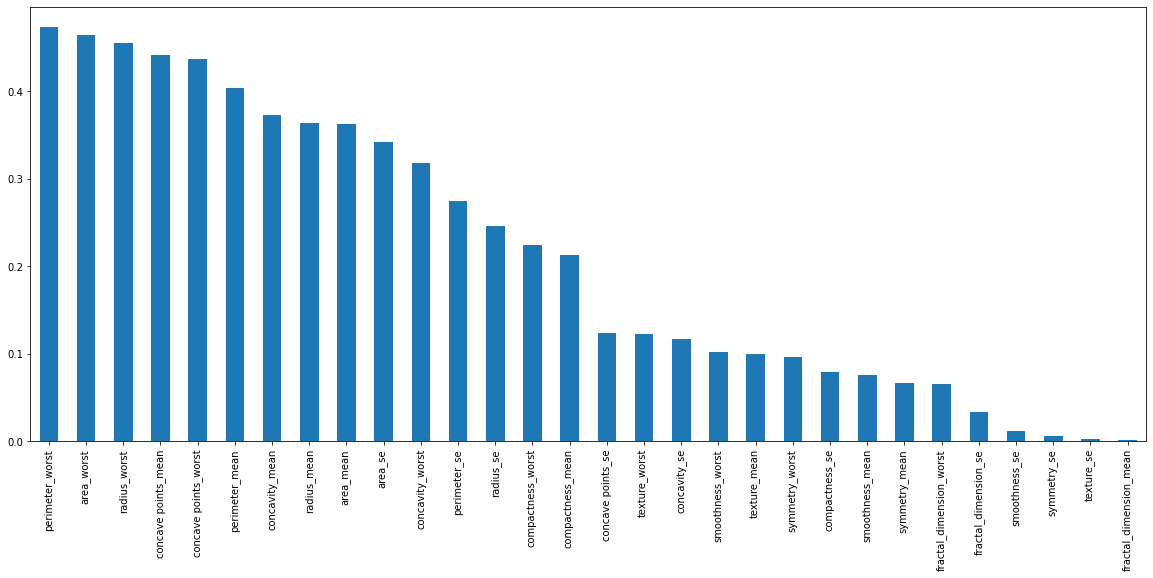

In [38]:
#let's plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [39]:
#No we Will select the  top 21 important features
sel_21_cols = SelectKBest(mutual_info_classif, k=21)
sel_21_cols.fit(X, y)
X.columns[sel_21_cols.get_support()]

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'compactness_mean', 'concavity_mean', 'concave points_mean',
       'radius_se', 'perimeter_se', 'area_se', 'concavity_se',
       'concave points_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
       'area_worst', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'concave points_worst', 'symmetry_worst'],
      dtype='object')

### Feature Importance methods

In [40]:
## Feature importance
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier()
model.fit(X, y)

def feat_importance(m,df):
    importance = m.feature_importances_
    importance = pd.DataFrame(importance,index=df.columns,columns=["Importance"])
    return importance.sort_values(by=['Importance'],ascending=False)

importance = feat_importance(model,X)
importance[:]*100

,Importance
perimeter_worst,14.816055
concave points_worst,14.058420
area_worst,12.274023
concave points_mean,10.067347
radius_worst,9.487230
concavity_mean,5.838097
perimeter_mean,4.611650
radius_mean,3.494576
area_mean,3.406127
concavity_worst,2.447623


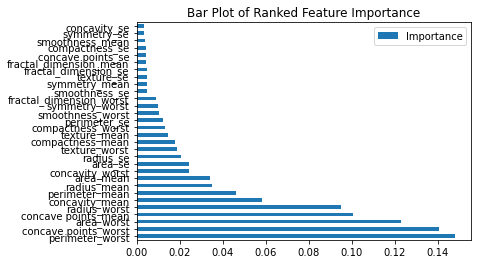

In [41]:
#importance.plot(kind='bar')
importance.plot(kind='barh')

plt.title("Bar Plot of Ranked Feature Importance")
plt.show()

In [42]:
#Discarding features with feature coefficients less than 0.01

to_keep = importance[importance['Importance'] > 0.01].index

X_new = X[to_keep].copy()
X_new

,perimeter_worst,concave points_worst,area_worst,concave points_mean,radius_worst,concavity_mean,perimeter_mean,radius_mean,area_mean,concavity_worst,area_se,radius_se,texture_worst,compactness_mean,texture_mean,compactness_worst,perimeter_se,smoothness_worst,symmetry_worst
0,184.60,0.2654,1937.05,0.14710,25.380,0.28241,122.80,17.99,1001.0,0.7119,86.20,0.84865,17.33,0.22862,10.38,0.62695,5.9835,0.16220,0.41915
1,158.80,0.1860,1937.05,0.07017,24.990,0.08690,132.90,20.57,1326.0,0.2416,74.08,0.54350,23.41,0.07864,17.77,0.18660,3.3980,0.12380,0.27500
2,152.50,0.2430,1709.00,0.12790,23.570,0.19740,130.00,19.69,1203.0,0.4504,86.20,0.74560,25.53,0.15990,21.25,0.42450,4.5850,0.14440,0.36130
3,98.87,0.2575,567.70,0.10520,14.910,0.24140,77.58,11.42,386.1,0.6869,27.23,0.49560,26.50,0.22862,20.38,0.62695,3.4450,0.19010,0.41915
4,152.20,0.1625,1575.00,0.10430,22.540,0.19800,135.10,20.29,1297.0,0.4000,86.20,0.75720,16.67,0.13280,14.34,0.20500,5.4380,0.13740,0.23640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,166.10,0.2216,1937.05,0.13890,25.450,0.24390,142.00,21.56,1326.3,0.4107,86.20,0.84865,26.40,0.11590,22.39,0.21130,5.9835,0.14100,0.20600
565,155.00,0.1628,1731.00,0.09791,23.690,0.14400,131.20,20.13,1261.0,0.3215,86.20,0.76550,38.25,0.10340,28.25,0.19220,5.2030,0.11660,0.25720
566,126.70,0.1418,1124.00,0.05302,18.980,0.09251,108.30,16.60,858.1,0.3403,48.55,0.45640,34.12,0.10230,28.08,0.30940,3.4250,0.11390,0.22180
567,184.60,0.2650,1821.00,0.15200,25.740,0.28241,140.10,20.60,1265.0,0.7855,86.20,0.72600,39.42,0.22862,29.33,0.62695,5.7720,0.16500,0.40870


## Note:  From the above analysis select the features based on the F_classifier (anova)

In [43]:
new_data= data[['perimeter_worst', 'area_worst', 'radius_worst', 'concave points_worst', 'concave points_mean', 'perimeter_mean', 'area_mean', 'radius_mean', 'area_se', 'concavity_mean', 'concavity_worst', 'perimeter_se', 'radius_se', 'compactness_worst', 'compactness_mean', 'texture_worst', 'concave points_se', 'smoothness_worst', 'texture_mean', 'symmetry_worst', 'concavity_se','diagnosis']]

In [44]:
new_data.head()

# after feature selection select the most important features are

,perimeter_worst,area_worst,radius_worst,concave points_worst,concave points_mean,perimeter_mean,area_mean,radius_mean,area_se,concavity_mean,concavity_worst,perimeter_se,radius_se,compactness_worst,compactness_mean,texture_worst,concave points_se,smoothness_worst,texture_mean,symmetry_worst,concavity_se,diagnosis
0,184.60,1937.05,25.38,0.2654,0.14710,122.80,1001.0,17.99,86.20,0.28241,0.7119,5.9835,0.84865,0.62695,0.22862,17.33,0.01587,0.1622,10.38,0.41915,0.05373,0
1,158.80,1937.05,24.99,0.1860,0.07017,132.90,1326.0,20.57,74.08,0.08690,0.2416,3.3980,0.54350,0.18660,0.07864,23.41,0.01340,0.1238,17.77,0.27500,0.01860,0
2,152.50,1709.00,23.57,0.2430,0.12790,130.00,1203.0,19.69,86.20,0.19740,0.4504,4.5850,0.74560,0.42450,0.15990,25.53,0.02058,0.1444,21.25,0.36130,0.03832,0
3,98.87,567.70,14.91,0.2575,0.10520,77.58,386.1,11.42,27.23,0.24140,0.6869,3.4450,0.49560,0.62695,0.22862,26.50,0.01867,0.1901,20.38,0.41915,0.05661,0
4,152.20,1575.00,22.54,0.1625,0.10430,135.10,1297.0,20.29,86.20,0.19800,0.4000,5.4380,0.75720,0.20500,0.13280,16.67,0.01885,0.1374,14.34,0.23640,0.05688,0


## Model  Creation

In [45]:
# MOdel Creation

from sklearn.preprocessing import StandardScaler


from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

from sklearn import metrics

from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import classification_report

from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import plot_confusion_matrix

Count of each class: 
 1    357
0    212
Name: diagnosis, dtype: int64


Percentage of each class :  
 1    62.741652
0    37.258348
Name: diagnosis, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


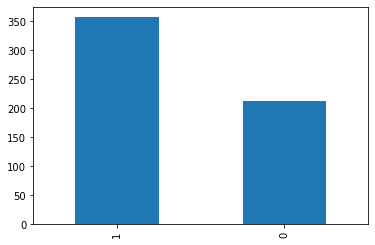

In [46]:
# Separate the target column the from the dataset
X = new_data.drop(columns=['diagnosis'])
y=new_data["diagnosis"] 


# for imabalne data set
print("Count of each class:","\n",y.value_counts()) # imbalnce dataset
# Percentage calculation
print("\n")
print("Percentage of each class : ","\n",(y.value_counts()/y.count())*100)
print(y.value_counts().plot(kind = 'bar'))


### Data set Quite Balance

In [47]:
scaler =StandardScaler()

scaled = scaler.fit_transform(X)


'''"For Logistic regression algorithm (Based on algorithm)scaling the data set,
to give equal importance to all features"'''

X_scaled=pd.DataFrame(scaled)
X_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,2.439568,2.287627,2.006477,2.296076,2.620973,1.357375,1.184085,1.176800,2.110995,2.647422,2.246192,2.343091,2.280613,2.641905,2.541404,-1.375159,0.778698,1.344571,-2.121200,2.443918,1.152362
1,1.631542,2.287627,1.921384,1.087084,0.574944,1.795991,2.249396,1.949929,1.611678,-0.000497,-0.137634,0.498609,0.780609,-0.443388,-0.498189,-0.370048,0.328106,-0.376886,-0.354875,-0.234408,-0.556348
2,1.434234,1.807751,1.611558,1.955000,2.110330,1.670052,1.846217,1.686226,2.110995,1.496076,0.920718,1.345409,1.774057,1.223448,1.148680,-0.019582,1.637925,0.546604,0.476899,1.369057,0.402825
3,-0.245395,-0.593838,-0.277945,2.175786,1.506601,-0.606410,-0.831485,-0.791983,-0.318438,2.091997,2.119474,0.532139,0.545151,2.641905,2.541404,0.140773,1.289491,2.595317,0.268955,2.443918,1.292444
4,1.424838,1.525780,1.386825,0.729259,1.482665,1.891531,2.154338,1.866023,2.110995,1.504202,0.665254,1.953934,1.831079,-0.314469,0.599453,-1.484267,1.322328,0.232796,-1.174698,-0.951602,1.305576


The number of classes before fit Counter({1: 357, 0: 212})
The number of classes after fit Counter({1: 357, 0: 267})


Count of each class after oversampling: 
 1    357
0    267
Name: diagnosis, dtype: int64


Percentage of each class after oversampling :  
 1    57.211538
0    42.788462
Name: diagnosis, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


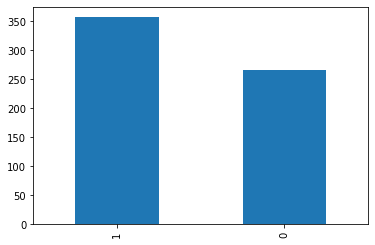

In [48]:
### Handle the imbalance dataset by using oversampling methods
###!pip install imblearn

from imblearn.over_sampling import RandomOverSampler

from collections import Counter

os=RandomOverSampler(0.75)

X_ov,y_ov=os.fit_resample(X_scaled,y)

print("The number of classes before fit {}".format(Counter(y))) # Before oversampling
print("The number of classes after fit {}".format(Counter(y_ov)))# After Oversamplig
print("\n")

print("Count of each class after oversampling:","\n",y_ov.value_counts()) # balance dataset
print("\n")
print("Percentage of each class after oversampling : ","\n",(y_ov.value_counts()/y_ov.count())*100)
print(y_ov.value_counts().plot(kind = 'bar'))

In [49]:
### Split the Dataset

print("Split the data into training and test set")
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_ov,y_ov, test_size=0.25, random_state=355)

# For model training and evaluation

print('X_train columns : {a} and Rows : {b}'.format(a=X_train.shape[1],b=X_train.shape[0]))
print('X_test columns : {a} and Rows : {b}'.format(a=X_test.shape[1],b=X_test.shape[0]))

Split the data into training and test set
X_train columns : 21 and Rows : 468
X_test columns : 21 and Rows : 156


In [50]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import  KFold,cross_val_score
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
%matplotlib inline


models = []

models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SGD', SGDClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('SVC', SVC()))
## nave bayes
models.append(('GNB', GaussianNB()))
models.append(('CNB', CategoricalNB()))
## Bagging Model
models.append(('RF', RandomForestClassifier()))
## Boosting Model
models.append(('Ada', AdaBoostClassifier()))
models.append(('Grad', GradientBoostingClassifier()))
models.append(('Xgb', XGBClassifier()))
# Stacking CLassifier
estimators = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('svr', make_pipeline(StandardScaler(),
                          LinearSVC(random_state=42)))]
models.append(('STK', StackingClassifier( estimators=estimators)))

SEED = 121

# Model Evaluation

result = []
model_names = []
scoring = ['accuracy', 'recall', 'precision', 'roc_auc']

for model_name, model in models:
    kfold = KFold(n_splits=10, random_state=121,shuffle=True)
    cv_results1 = cross_val_score(model, X_train, y_train, cv = kfold, scoring=scoring[0])
    cv_results2 = cross_val_score(model, X_train, y_train, cv = kfold, scoring=scoring[1])
    cv_results3 = cross_val_score(model, X_train, y_train, cv = kfold, scoring=scoring[2])
    cv_results4 = cross_val_score(model, X_train, y_train, cv = kfold, scoring=scoring[3])
    model_names.append(model_name)
    msg = "%s:\n ACCURACY = %f, RECALL=(%f), PRECISION=(%f), ROC-AUC=(%f)" % (model_name, cv_results1.mean(),cv_results2.mean(), cv_results3.mean(), cv_results4.mean())
    print(msg)

LR:
 ACCURACY = 0.967993, RECALL=(0.974229), PRECISION=(0.970238), ROC-AUC=(0.992866)
KNN:
 ACCURACY = 0.959297, RECALL=(0.977095), PRECISION=(0.953019), ROC-AUC=(0.987067)
SGD:
 ACCURACY = 0.957354, RECALL=(0.952153), PRECISION=(0.970103), ROC-AUC=(0.993603)
DT:
 ACCURACY = 0.940056, RECALL=(0.930117), PRECISION=(0.968527), ROC-AUC=(0.923669)
SVC:
 ACCURACY = 0.961425, RECALL=(0.972821), PRECISION=(0.959630), ROC-AUC=(0.992495)
GNB:
 ACCURACY = 0.935661, RECALL=(0.955212), PRECISION=(0.934858), ROC-AUC=(0.985095)
CNB:
 ACCURACY = nan, RECALL=(nan), PRECISION=(nan), ROC-AUC=(nan)
RF:
 ACCURACY = 0.974329, RECALL=(0.974308), PRECISION=(0.985403), ROC-AUC=(0.994339)
Ada:
 ACCURACY = 0.970028, RECALL=(0.977487), PRECISION=(0.971359), ROC-AUC=(0.995691)
Grad:
 ACCURACY = 0.970028, RECALL=(0.970070), PRECISION=(0.978467), ROC-AUC=(0.996999)
[16:03:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation 

[16:03:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:03:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:03:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:03:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

### Note:From the Model Logistic regression (0.972294), Random forest(0.974329), Ada Boosting(0.972155), XgBosting(0.976457), Stacking(0.976549)

## Model: LogisticRegression_Model

In [51]:
# Create a model by Logistic Regression
log_reg = LogisticRegression()


# RandomSearch CV :Create dict for the ada parameter
random_param = {
    "penalty":["l1", "l2", "elasticnet"], 
    "fit_intercept":[True,False], 
    'random_state' : range(100,500),
    'solver':["newton-cg", "lbfgs", "liblinear","sag","saga"],
    "multi_class":["auto","ovr","multinomial"]
}

# random cv model
random_search_log = RandomizedSearchCV(estimator=LogisticRegression(),
                     param_distributions=random_param,random_state=42,
                     cv=5,
                    n_jobs =-1,verbose=2)

print("Parameters: ",random_search_log.fit(X_train,y_train))
# Fit the train dataset to get better parameteres
print("\n")
best_parameters_log = random_search_log.best_params_
print("The Parameters are :",best_parameters_log)
print("\n")
print("Mean cross-validated score of the best_estimator:",random_search_log.best_score_ )


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Parameters:  RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'fit_intercept': [True, False],
                                        'multi_class': ['auto', 'ovr',
                                                        'multinomial'],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'random_state': range(100, 500),
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   random_state=42, verbose=2)


The Parameters are : {'solver': 'sag', 'random_state': 186, 'penalty': 'l2', 'multi_class': 'auto', 'fit_intercept': True}


Mean cross-validated score of the best_estimator: 0.9679478380233355


In [52]:
log_reg=LogisticRegression(solver= "sag", random_state= 186,
                             penalty="l2", multi_class= "auto",fit_intercept=True)
# Fit the train datapoints in LogisticRegression model
print(log_reg.fit(X_train,y_train))

# predict the X_test data set and find the predictited value
y_pred_log= log_reg.predict(X_test)

print("Training accuracy",accuracy_score(y_train,log_reg.predict(X_train))*100)
print("Testing accuracy",accuracy_score(y_test,y_pred_log)*100)

LogisticRegression(random_state=186, solver='sag')
Training accuracy 97.64957264957265
Testing accuracy 97.43589743589743


lOGISTIC REGRESSION MODEL PERFORMANCE MATRIX(CONFUSION MATRIX):
1.Confusion_Matrix :  
 [[68  3]
 [ 1 84]]


plot_confusion_matrix:


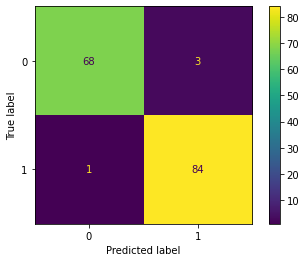

2.Confusion_matrix accuracy : 0.9743589743589743
3.Confusion_matrix precision : 0.9655172413793104
4.Confusion_matrix recall : 0.9882352941176471
5.Confusion_matrix f1_score : 0.9767441860465116
6.Classification Report : 
               precision    recall  f1-score   support

           0       0.99      0.96      0.97        71
           1       0.97      0.99      0.98        85

    accuracy                           0.97       156
   macro avg       0.98      0.97      0.97       156
weighted avg       0.97      0.97      0.97       156



In [53]:
print("lOGISTIC REGRESSION MODEL PERFORMANCE MATRIX(CONFUSION MATRIX):")

#accuracy_log=round(metrics.accuracy_score(y_test,y_pred_log),2)
accuracy_log=metrics.accuracy_score(y_test,y_pred_log)
recall_log= metrics.recall_score(y_test,y_pred_log)
Precision_log=metrics.precision_score(y_test,y_pred_log)
f1_score_log=metrics.f1_score(y_test,y_pred_log)
cf_matrix_log = confusion_matrix(y_true = y_test, y_pred = y_pred_log)

print("1.Confusion_Matrix : ","\n",cf_matrix_log)

print("\n")
print("plot_confusion_matrix:")
plot_confusion_matrix(log_reg, X_test, y_test)  
plt.show()

print("2.Confusion_matrix accuracy :",accuracy_log)
print("3.Confusion_matrix precision :",Precision_log)
print("4.Confusion_matrix recall :",recall_log)
print("5.Confusion_matrix f1_score :",f1_score_log)
print("6.Classification Report :","\n",classification_report(y_test, y_pred_log))

## Model : ADA Boosting

In [54]:
Ada_model=AdaBoostClassifier()
# adaboost model

# RandomSearch CV :Create dict for the ada parameter
random_param = {
    "n_estimators":range(10,100), 
    "algorithm":["SAMME","SAMME.R"], 
    'random_state' : range(100,500),
    'learning_rate':range(1,5)
}

# random cv model
random_search_ada = RandomizedSearchCV(estimator=AdaBoostClassifier(),
                     param_distributions=random_param,random_state=42,
                     cv=5,
                    n_jobs =-1,verbose=2)

print("Parameters: ",random_search_ada.fit(X_train,y_train))

best_parameters_ada = random_search_ada.best_params_
print("\n")
best_parameters_ada = random_search_ada.best_params_
print("The Parameters are :",best_parameters_ada)
print("\n")
print("Mean cross-validated score of the best_estimator:",random_search_ada.best_score_ )

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Parameters:  RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
                   param_distributions={'algorithm': ['SAMME', 'SAMME.R'],
                                        'learning_rate': range(1, 5),
                                        'n_estimators': range(10, 100),
                                        'random_state': range(100, 500)},
                   random_state=42, verbose=2)


The Parameters are : {'random_state': 167, 'n_estimators': 17, 'learning_rate': 1, 'algorithm': 'SAMME.R'}


Mean cross-validated score of the best_estimator: 0.9615191031800503


In [55]:
Ada_model=AdaBoostClassifier(random_state= 167, n_estimators= 17,learning_rate=1, 
                             algorithm= "SAMME.R")
#Fit the train datapoints in AdaBoostClassifier model

print(Ada_model.fit(X_train,y_train))

# predict the X_test data set and find the predictited value
y_pred_ada= Ada_model.predict(X_test)

print("Training accuracy",accuracy_score(y_train,Ada_model.predict(X_train))*100)
print("Testing accuracy",accuracy_score(y_test,y_pred_ada)*100)

AdaBoostClassifier(learning_rate=1, n_estimators=17, random_state=167)
Training accuracy 99.14529914529915
Testing accuracy 95.51282051282051


AdaBoostClassifier MODEL PERFORMANCE MATRIX(CONFUSION MATRIX):
1.Confusion_Matrix :  
 [[69  2]
 [ 5 80]]


plot_confusion_matrix:


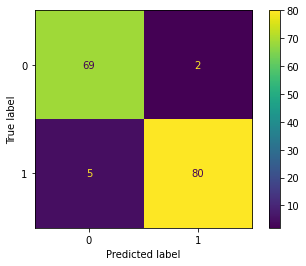

2.Confusion_matrix accuracy : 0.9551282051282052
3.Confusion_matrix precision : 0.975609756097561
4.Confusion_matrix recall : 0.9411764705882353
5.Confusion_matrix f1_score : 0.9580838323353293
6.Classification Report : 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95        71
           1       0.98      0.94      0.96        85

    accuracy                           0.96       156
   macro avg       0.95      0.96      0.95       156
weighted avg       0.96      0.96      0.96       156



In [56]:
print("AdaBoostClassifier MODEL PERFORMANCE MATRIX(CONFUSION MATRIX):")

#accuracy_ada=round(metrics.accuracy_score(y_test,y_pred_ada),2)
accuracy_ada=metrics.accuracy_score(y_test,y_pred_ada)
recall_ada= metrics.recall_score(y_test,y_pred_ada)
Precision_ada=metrics.precision_score(y_test,y_pred_ada)
f1_score_ada=metrics.f1_score(y_test,y_pred_ada)
cf_matrix_ada = confusion_matrix(y_true = y_test, y_pred = y_pred_ada)

print("1.Confusion_Matrix : ","\n",cf_matrix_ada)
print("\n")
print("plot_confusion_matrix:")
plot_confusion_matrix(Ada_model, X_test, y_test)  
plt.show()

print("2.Confusion_matrix accuracy :",accuracy_ada)
print("3.Confusion_matrix precision :",Precision_ada)
print("4.Confusion_matrix recall :",recall_ada)
print("5.Confusion_matrix f1_score :",f1_score_ada)
print("6.Classification Report :","\n",classification_report(y_test, y_pred_ada))

## Model: RandomForest Classifier

In [57]:

#Rf_model=RandomForestClassifier()
# RandomForestClassifier model

# RandomSearch CV :Create dict for the ada parameter
random_param_rf = {
    "n_estimators":range(50,500), 
    "criterion":["gini","entropy","log_loss"], 
    'max_depth' : range(10,50),
    'min_samples_split':range(1,5),
    "min_samples_leaf":range(1,5),
    "max_features":["sqrt","log2"]
}

# random cv model
random_search_Rf = RandomizedSearchCV(estimator=RandomForestClassifier(),
                     param_distributions=random_param_rf,random_state=42,
                     cv=5,
                    n_jobs =-1,verbose=2)

print("Parameters: ",random_search_Rf.fit(X_train,y_train))

best_parameters_Rf = random_search_Rf.best_params_
print("\n")
best_parameters_Rf = random_search_Rf.best_params_
print("The Parameters are :",best_parameters_Rf)
print("\n")
print("Mean cross-validated score of the best_estimator:",random_search_Rf.best_score_ )

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Parameters:  RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': range(10, 50),
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': range(1, 5),
                                        'min_samples_split': range(1, 5),
                                        'n_estimators': range(50, 500)},
                   random_state=42, verbose=2)


The Parameters are : {'n_estimators': 255, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 16, 'criterion': 'entropy'}


Mean cross-validated score of the best_estimator: 0.9764813543811485


In [58]:
Rf_model=RandomForestClassifier(n_estimators= 255, min_samples_split= 4,
                                min_samples_leaf=1, max_features= "log2",
                               max_depth=16,criterion="entropy")
#Fit the train datapoints in RandomForestClassifier model

print(Rf_model.fit(X_train,y_train))

# predict the X_test data set and find the predictited value
y_pred_Rf= Rf_model.predict(X_test)

print("Training accuracy",accuracy_score(y_train,Rf_model.predict(X_train))*100)
print("Testing accuracy",accuracy_score(y_test,y_pred_Rf)*100)


RandomForestClassifier(criterion='entropy', max_depth=16, max_features='log2',
                       min_samples_split=4, n_estimators=255)
Training accuracy 100.0
Testing accuracy 97.43589743589743


RandomForestClassifier MODEL PERFORMANCE MATRIX(CONFUSION MATRIX):
1.Confusion_Matrix :  
 [[71  0]
 [ 4 81]]


plot_confusion_matrix:


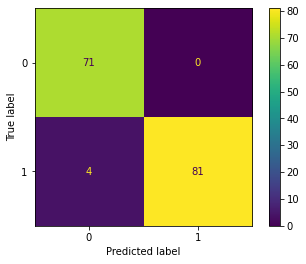

2.Confusion_matrix accuracy : 0.9743589743589743
3.Confusion_matrix precision : 1.0
4.Confusion_matrix recall : 0.9529411764705882
5.Confusion_matrix f1_score : 0.9759036144578312
6.Classification Report : 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        71
           1       1.00      0.95      0.98        85

    accuracy                           0.97       156
   macro avg       0.97      0.98      0.97       156
weighted avg       0.98      0.97      0.97       156



In [59]:
print("RandomForestClassifier MODEL PERFORMANCE MATRIX(CONFUSION MATRIX):")

#accuracy_rf=round(metrics.accuracy_score(y_test,y_pred_rf),2)
accuracy_rf=metrics.accuracy_score(y_test,y_pred_Rf)
recall_rf= metrics.recall_score(y_test,y_pred_Rf)
Precision_rf=metrics.precision_score(y_test,y_pred_Rf)
f1_score_rf=metrics.f1_score(y_test,y_pred_Rf)
cf_matrix_rf = confusion_matrix(y_true = y_test, y_pred = y_pred_Rf)

print("1.Confusion_Matrix : ","\n",cf_matrix_rf)
print("\n")
print("plot_confusion_matrix:")
plot_confusion_matrix(Rf_model, X_test, y_test)  
plt.show()

print("2.Confusion_matrix accuracy :",accuracy_rf)
print("3.Confusion_matrix precision :",Precision_rf)
print("4.Confusion_matrix recall :",recall_rf)
print("5.Confusion_matrix f1_score :",f1_score_rf)
print("6.Classification Report :","\n",classification_report(y_test, y_pred_Rf))

## Model : Xgboost Classifier

In [62]:
random_param_Xgb={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}
# RandomSearch CV :Create dict for the Xgb parameter


# random cv model
random_search_xgb = RandomizedSearchCV(estimator=XGBClassifier(),
                     param_distributions=random_param_Xgb,random_state=42,
                     cv=5,
                    n_jobs =-1,verbose=2)

print("Parameters: ",random_search_xgb.fit(X_train,y_train))

best_parameters_xgb = random_search_xgb.best_params_
print("\n")
best_parameters_xgb = random_search_xgb.best_params_
print("The Parameters are :",best_parameters_xgb)
print("\n")
print("Mean cross-validated score of the best_estimator:",random_search_xgb.best_score_ )

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[16:15:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Parameters:  RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                       

In [68]:
xgb_model=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.7, gamma=0.4, learning_rate=0.2,
       max_delta_step=0, max_depth=15, min_child_weight=1,
       n_estimators=100, n_jobs=1,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1)
       #subsample=1")
#Fit the train datapoints in RandomForestClassifier model

print(xgb_model.fit(X_train,y_train))

# predict the X_test data set and find the predictited value
y_pred_xgb= xgb_model.predict(X_test)

print("Training accuracy",accuracy_score(y_train,xgb_model.predict(X_train))*100)
print("Testing accuracy",accuracy_score(y_test,y_pred_xgb)*100)

[16:20:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7,
              enable_categorical=False, gamma=0.4, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=1, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)
Training accuracy 100.0
Testing accuracy 

XgbClassifier MODEL PERFORMANCE MATRIX(CONFUSION MATRIX):
1.Confusion_Matrix :  
 [[71  0]
 [ 4 81]]


plot_confusion_matrix:


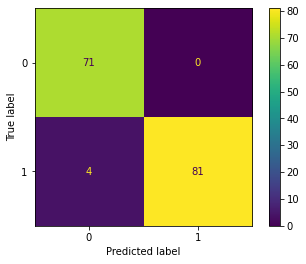

2.Confusion_matrix accuracy : 0.9743589743589743
3.Confusion_matrix precision : 1.0
4.Confusion_matrix recall : 0.9529411764705882
5.Confusion_matrix f1_score : 0.9759036144578312
6.Classification Report : 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        71
           1       1.00      0.95      0.98        85

    accuracy                           0.97       156
   macro avg       0.97      0.98      0.97       156
weighted avg       0.98      0.97      0.97       156



In [69]:
print("XgbClassifier MODEL PERFORMANCE MATRIX(CONFUSION MATRIX):")

#accuracy_rf=round(metrics.accuracy_score(y_test,y_pred_rf),2)
accuracy_xgb=metrics.accuracy_score(y_test,y_pred_xgb)
recall_xgb= metrics.recall_score(y_test,y_pred_xgb)
Precision_xgb=metrics.precision_score(y_test,y_pred_xgb)
f1_score_xgb=metrics.f1_score(y_test,y_pred_xgb)
cf_matrix_xgb = confusion_matrix(y_true = y_test, y_pred = y_pred_xgb)

print("1.Confusion_Matrix : ","\n",cf_matrix_xgb)
print("\n")
print("plot_confusion_matrix:")
plot_confusion_matrix(xgb_model, X_test, y_test)  
plt.show()

print("2.Confusion_matrix accuracy :",accuracy_xgb)
print("3.Confusion_matrix precision :",Precision_xgb)
print("4.Confusion_matrix recall :",recall_xgb)
print("5.Confusion_matrix f1_score :",f1_score_xgb)
print("6.Classification Report :","\n",classification_report(y_test, y_pred_xgb))